## Script to ananlyse and plot otput files from fluent ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
workingDir=r"C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4IR9-Solartron\WP3-local\03_Results"
testCase=r"testPoint_06\Final-Pcorrection"
#caseName="report-def-0-rfile.out"
#caseName="pressuretaps-k_epsilon-RNG-STD_1_1.out"
#caseName="pressuretaps-k_epsilon-STD_1_1.out"
#caseName="pressuretaps-kwSST-STD_1_1.out"
caseName="pressure-taps-rfile_6_1.out"
case=os.path.join(workingDir,testCase,caseName)
print(case)

C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4IR9-Solartron\WP3-local\03_Results\testPoint_06\Final-Pcorrection\pressure-taps-rfile_6_1.out


In [5]:
data=pd.read_csv(case, sep=' ', skiprows=3, names=['iter','pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8'])

In [6]:
pressureTap=(['iter','pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8'])

In [7]:
for nome in pressureTap[1:]:
    print(data[nome].mean())

6384472.740438289
6363078.250735548
6379809.177620976
6383707.801097352
6375506.821895253
6375506.251191746
6381273.44508636
6381550.670898424


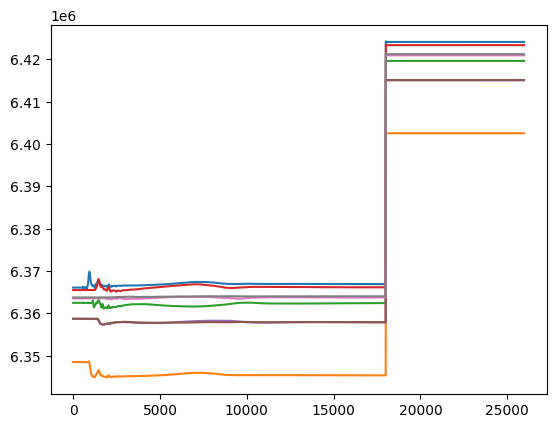

In [8]:
for nome in pressureTap[1:]:
    data[nome].plot()

In [7]:
plt.show()

# Extract sub set #
To extract a subset of a Pandas DataFrame based on index positions, you can use the `iloc` method. Here is an example:

```python
df_subset = df.iloc[i:j+1, :]
```

Here, `df` is the original DataFrame, `i` is the starting index position, and `j` is the ending index position. The `+1` is added to include the last index position in the subset. The second argument `:` indicates that we want to include all columns in the subset.

For example, if you have a DataFrame with 10 rows and 5 columns and you want to extract rows 3 to 7 (inclusive), you can use the following code:

```python
df_subset = df.iloc[3:8, :]
```

To extract a subset of a Pandas DataFrame based on index positions and specific columns, you can use the `iloc` method. Here is an example:

```python
df_subset = df.iloc[i:j+1, [column_index1, column_index2, ...]]
```

Here, `df` is the original DataFrame, `i` is the starting index position, and `j` is the ending index position. The `+1` is added to include the last index position in the subset. The second argument `[column_index1, column_index2, ...]` indicates that we want to include only specific columns in the subset. Replace `column_index1`, `column_index2`, etc. with the index positions of the columns you want to include.

For example, if you have a DataFrame with 10 rows and 5 columns and you want to extract rows 3 to 7 (inclusive) and columns 1, 3, and 4, you can use the following code:

```python
df_subset = df.iloc[3:8, [1, 3, 4]]
```

In [9]:
 dfsub=data.iloc[18000:22000, :]

In [10]:
for nome in pressureTap[1:]:
    print(dfsub[nome].mean())

6424111.43661787
6402541.532403788
6419632.436240748
6423354.170895593
6415051.293227564
6415109.468662136
6420944.8387147505
6421220.506731514


# Calculations using numpy #

Converting data to numpy ( data are easier to manipulate compared to pandas) and 
evaluation of dp 

The approach at the moment is similar to the previous mixer

In [10]:
psub=dfsub.to_numpy()/100

In [11]:
dp=np.zeros_like(psub)

In [12]:
dp[:,0]=(psub[:,1]-psub[:,2])

In [13]:
dp[:,1]=(psub[:,1]-psub[:,3])

In [14]:
dp[:,2]=(psub[:,4]-psub[:,5])

In [15]:
dp[:,3]=(psub[:,4]-psub[:,6])

In [16]:
dp[:,4]=(psub[:,7]-psub[:,8])

In [17]:
x=np.arange(0,len(dp))

In [18]:
plt.ioff()
#plt.ion()

In [19]:
fig, ax = plt.subplots(8, sharex=True, figsize=(8,6))
x=np.arange(0,len(dp))
for j in [1,2,3,4,5,6,7,8]:
#for j in [0]:
    ax[j-1].plot(x,psub[:,j], '--', label='line plot')
    y_avg =np.full(np.shape(psub)[0],np.average(psub[:,j]))
    avg=np.average(psub[:,j])
    y1=np.full(np.shape(psub)[0],np.std(psub[:,j]))
    std=np.std(psub[:,j])
 #   y2=-(np.full(np.shape(dp)[0],np.std(dp[:,j])))
    ax[j-1].plot(x,y_avg,  color='red', lw=2, ls='--', label="average value")
    ax[j-1].fill_between(x,(y_avg-y1), (y_avg+y1), color='green', alpha=.5, linewidth=0)
    ax[j-1].text(1,0.3, 'AVG= %5.2f \n STD=%5.2f' %(avg,std), transform=ax[j-1].transAxes,
    bbox=dict(facecolor='white', alpha=0.7))
    #ax[j].legend(loc=1)

#ax[1].boxplot(dp['dp'])


In [20]:
printFile=caseName.split(".",1)[0]
printFile=printFile+"ptaps"+".png"
figure=os.path.join(workingDir,testCase,printFile)
plt.savefig(figure)


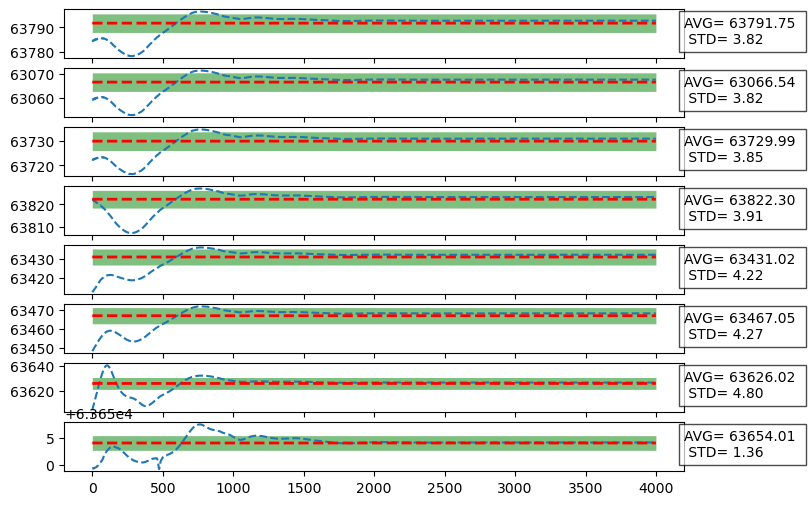

In [21]:
plt.show()

In [22]:
fig, ax = plt.subplots(5, sharex=True, figsize=(8,6))
x=np.arange(0,len(dp))
for j in [0,1,2,3,4]:
#for j in [0]:
    ax[j].plot(x,dp[:,j], '--', label='line plot')
    y_avg =np.full(np.shape(dp)[0],np.average(dp[:,j]))
    avg=np.average(dp[:,j])
    y1=np.full(np.shape(dp)[0],np.std(dp[:,j]))
    std=np.std(dp[:,j])
 #   y2=-(np.full(np.shape(dp)[0],np.std(dp[:,j])))
    ax[j].plot(x,y_avg,  color='red', lw=2, ls='--', label="average value")
    ax[j].fill_between(x,(y_avg-y1), (y_avg+y1), color='green', alpha=.5, linewidth=0)
    ax[j].text(0.05,0.6, 'AVG= %5.2f \n STD=%5.2f' %(avg,std), transform=ax[j].transAxes,
    bbox=dict(facecolor='white', alpha=0.7))
    #ax[j].legend(loc=1)

#ax[1].boxplot(dp['dp'])


In [23]:
printFile=caseName.split(".",1)[0]
printFile=printFile+".png"
figure=os.path.join(workingDir,testCase,printFile)
plt.savefig(figure)


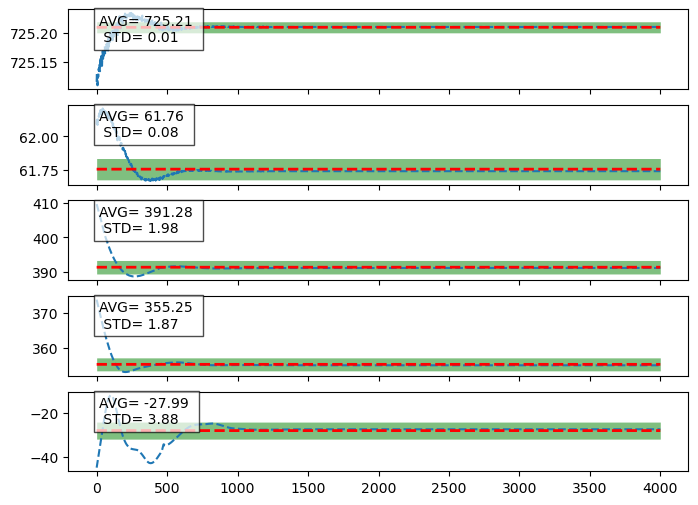

In [24]:
plt.show()